In [178]:
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import plotly.express as px
from plotly.subplots import make_subplots
import pickle
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('full_std.pkl', 'rb') as f:
    data = pickle.load(f)

In [192]:
roc_auc_stats = {
    model: {
        "mean": np.mean([run['roc_auc'] for run in runs]),
        "std": np.std([run['roc_auc'] for run in runs])
    }
    for model, runs in data.items()
}

roc_auc_df = pd.DataFrame.from_dict(roc_auc_stats, orient='index')

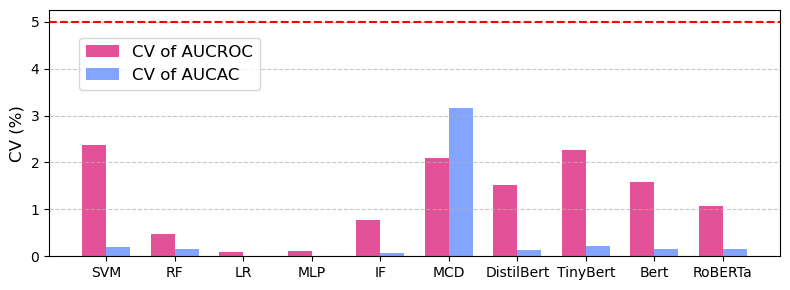

In [194]:
roc_auc_df['cv_roc_auc'] = [
    (np.std([run['roc_auc'] for run in runs]) / np.mean([run['roc_auc'] for run in runs])) * 100
    for model, runs in data.items()
]
roc_auc_df['cv_accuracy_coverage_00'] = [
    (np.std([run['accuracy_coverage_scores']['00'] for run in runs]) / np.mean([run['accuracy_coverage_scores']['00'] for run in runs])) * 100
    for model, runs in data.items()
]

name_mapping = {
    "svc": "SVM",
    "rf": "RF",
    "lr": "LR",
    "nn": "MLP",
    "IsoForest": "IF",
    "softmax_mv": "delete",
    "softmax_dp": "delete",
    "agreement_mv": "MCD",
    "agreement_dp": "delete",
    "distilbert": "DistilBert",
    "tinybert": "TinyBert",
    "bert": "Bert",
    "roberta-base": "RoBERTa"
}

roc_auc_df.rename(index=name_mapping, inplace=True)
roc_auc_df.drop(index=["delete"], inplace=True)

x = np.arange(len(roc_auc_df.index))
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 3))

bar1 = ax.bar(x - width/2, roc_auc_df['cv_roc_auc'], width, label='CV of AUCROC', color='#DC267F', alpha=0.8)
bar2 = ax.bar(x + width/2, roc_auc_df['cv_accuracy_coverage_00'], width, label='CV of AUCAC', color='#648FFF', alpha=0.8)

ax.axhline(y=5, color='red', linestyle='--')

ax.set_ylabel("CV (%)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(roc_auc_df.index, rotation=0)
ax.legend(fontsize=12, bbox_to_anchor=(0.3, 0.92))

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('appendix_std', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()